<a href="https://colab.research.google.com/github/PeriniM/Multilateration/blob/main/Multilateration_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset -f
from scipy.optimize import fsolve
import random as rnd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
x1, y1, x2_gen, y2_gen, x3_gen, y3_gen, x4_gen, y4_gen, x5_gen, y5_gen = (rnd.SystemRandom().random() for x in range(10))

# Multirateration 4 points in a plane (1 known)

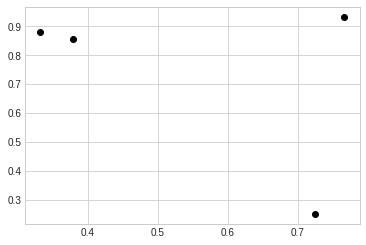

In [ ]:
plt.plot([x1, x2_gen, x3_gen, x4_gen], [y1, y2_gen, y3_gen, y4_gen], 'o', color='black');

In [ ]:
d12 = np.sqrt((x1-x2_gen)**2 + (y1-y2_gen)**2)
d13 = np.sqrt((x1-x3_gen)**2 + (y1-y3_gen)**2)
d14 = np.sqrt((x1-x4_gen)**2 + (y1-y4_gen)**2)
d23 = np.sqrt((x2_gen-x3_gen)**2 + (y2_gen-y3_gen)**2)
d24 = np.sqrt((x2_gen-x4_gen)**2 + (y2_gen-y4_gen)**2)
d34 = np.sqrt((x3_gen-x4_gen)**2 + (y3_gen-y4_gen)**2)

In [ ]:
print(d12,d13,d14,d23,d24,d34, sep="\n")

0.4383522782028957
0.7432427098009082
0.05358215211972959
0.6851613686097892
0.39489583683257085
0.6980268103479745


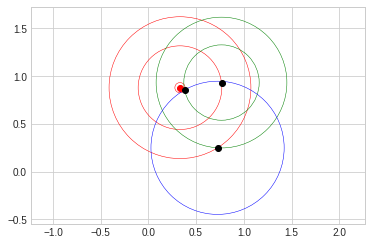

In [ ]:
cir1 = plt.Circle((x1, y1), d12,facecolor="none", linewidth=0.5, edgecolor = 'red')
cir2 = plt.Circle((x1, y1), d13,facecolor="none", linewidth=0.5, edgecolor = 'red')
cir3 = plt.Circle((x1, y1), d14,facecolor="none", linewidth=0.5, edgecolor = 'red')
cir4 = plt.Circle((x2_gen, y2_gen), d23,facecolor="none", linewidth=0.5, edgecolor = 'green')
cir5 = plt.Circle((x2_gen, y2_gen), d24,facecolor="none", linewidth=0.5, edgecolor = 'green')
cir6 = plt.Circle((x3_gen, y3_gen), d34,facecolor="none", linewidth=0.5, edgecolor = 'blue')
circles = [cir1, cir2, cir3, cir4, cir5, cir6]
for i in circles:
    plt.gca().add_patch(i)
plt.axis("equal")
plt.plot(x1,y1, 'o', color='red');
plt.plot([x2_gen, x3_gen, x4_gen], [y2_gen, y3_gen, y4_gen], 'o', color='black');

In [ ]:
def equations(vars): 
    x2, y2, x3, y3, x4, y4 = vars
    eq1 = (x1-x2)**2 + (y1-y2)**2 - d12**2
    eq2 = (x1-x3)**2 + (y1-y3)**2 - d13**2
    eq3 = (x1-x4)**2 + (y1-y4)**2 - d14**2
    eq4 = (x2-x3)**2 + (y2-y3)**2 - d23**2
    eq5 = (x2-x4)**2 + (y2-y4)**2 - d24**2
    eq6 = (x3-x4)**2 + (y3-y4)**2 - d34**2
    return [eq1, eq2, eq3, eq4, eq5, eq6]

In [ ]:

x2, y2, x3, y3, x4, y4 =  fsolve(equations, [0.5,0.5,0.5,0.5,0.5,0.5])
print(x2, y2, x3, y3, x4, y4, sep="\n")

0.4534062961233107
0.524177726316228
0.1047212740383834
0.682148635510294
-0.10348857677893254
0.7709748728348994


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
print(x1,y1, sep="\n")

0.33116723275746407
0.8795259980742361


***Actual positions vs predicted positions***

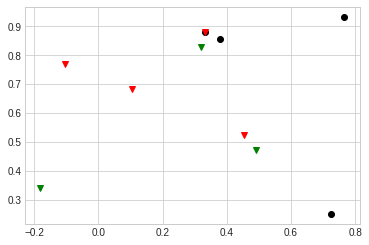

In [ ]:
plt.plot([x1, x2_gen, x3_gen, x4_gen], [y1, y2_gen, y3_gen, y4_gen], 'o', color='black'); # intial points
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'v', color='red'); # calculated points
plt.plot([0.4907, -0.1821, 0.3197], [0.4713, 0.3420, 0.8272], 'v', color='green'); #solved with matlab fminsearch


***Distance Error***

We notice that fsolve is able to give the correct distances to all the points but fails in the orientation

The predicted positions differ from the actual ones

In [ ]:
p1_err = np.sqrt((x1-x1)**2 + (y1-y1)**2)
p2_err = np.sqrt((x2-x2_gen)**2 + (y2-y2_gen)**2)
p3_err = np.sqrt((x3-x3_gen)**2 + (y3-y3_gen)**2)
p4_err = np.sqrt((x4-x4_gen)**2 + (y4-y4_gen)**2)

print(p1_err,p2_err,p3_err,p4_err, sep="\n")

0.0
0.16447403457279827
0.0706211731357369
0.04662855160577279


# Multilateration 5 points in a plane (0 known, just relative positions)

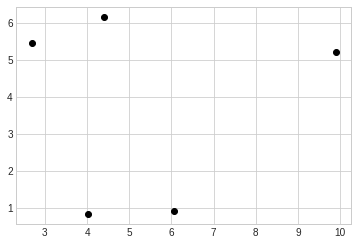

In [ ]:
x1_gen , y1_gen = (x1, y1)
plt.plot([x1_gen, x2_gen, x3_gen, x4_gen, x5_gen], [y1_gen, y2_gen, y3_gen, y4_gen,y5_gen], 'o', color='black');


In [ ]:
d12 = np.sqrt((x1_gen-x2_gen)**2 + (y1_gen-y2_gen)**2)
d13 = np.sqrt((x1_gen-x3_gen)**2 + (y1_gen-y3_gen)**2)
d14 = np.sqrt((x1_gen-x4_gen)**2 + (y1_gen-y4_gen)**2)
d23 = np.sqrt((x2_gen-x3_gen)**2 + (y2_gen-y3_gen)**2)
d24 = np.sqrt((x2_gen-x4_gen)**2 + (y2_gen-y4_gen)**2)
d34 = np.sqrt((x3_gen-x4_gen)**2 + (y3_gen-y4_gen)**2)

d15 = np.sqrt((x1_gen-x5_gen)**2 + (y1_gen-y5_gen)**2)
d25 = np.sqrt((x2_gen-x5_gen)**2 + (y2_gen-y5_gen)**2)
d35 = np.sqrt((x3_gen-x5_gen)**2 + (y3_gen-y5_gen)**2)
d45 = np.sqrt((x4_gen-x5_gen)**2 + (y4_gen-y5_gen)**2)

In [ ]:
print(d12,d13,d14,d23,d24,d34,d15,d25,d35,d45, sep="\n")

4.838735314160689
5.367060274722131
2.0346344264635774
1.8653768209964223
5.669833008072849
5.512430739067212
7.337413314327337
7.221194169699947
5.5722866345514355
5.769025085038334


In [ ]:
def equations(vars): 
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = vars
    eq1 = (x1-x2)**2 + (y1-y2)**2 - d12**2
    eq2 = (x1-x3)**2 + (y1-y3)**2 - d13**2
    eq3 = (x1-x4)**2 + (y1-y4)**2 - d14**2

    eq4 = (x2-x3)**2 + (y2-y3)**2 - d23**2
    eq5 = (x2-x4)**2 + (y2-y4)**2 - d24**2

    eq6 = (x3-x4)**2 + (y3-y4)**2 - d34**2

    eq7 = (x1-x5)**2 + (y1-y5)**2 - d15**2
    eq8 = (x2-x5)**2 + (y2-y5)**2 - d25**2
    eq9 = (x3-x5)**2 + (y3-y5)**2 - d35**2
    eq10 = (x4-x5)**2 + (y4-y5)**2 - d45**2
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10]

In [ ]:
x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 =  fsolve(equations, [1,1,1,1,1,1,1,1,1,1])

print(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, sep="\n")

-2.56486539255827
-4.500143045979351
2.0318414753028113
-2.9889695245561536
1.64027218343008
-1.1651536966742404
-3.633718025218855
-2.7688743495939945
-2.2439442978955606
2.8302487441763136


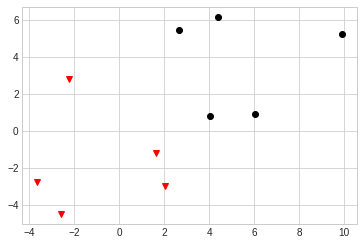

In [ ]:
plt.plot([x1_gen, x2_gen, x3_gen, x4_gen, x5_gen], [y1_gen, y2_gen, y3_gen, y4_gen,y5_gen], 'o', color='black');
plt.plot([x1, x2, x3, x4, x5], [y1, y2, y3, y4, y5], 'v', color='red'); # calculated points

***Distance Error***

In [ ]:
p1_err = np.sqrt((x1-x1_gen)**2 + (y1-y1_gen)**2)
p2_err = np.sqrt((x2-x2_gen)**2 + (y2-y2_gen)**2)
p3_err = np.sqrt((x3-x3_gen)**2 + (y3-y3_gen)**2)
p4_err = np.sqrt((x4-x4_gen)**2 + (y4-y4_gen)**2)
p5_err = np.sqrt((x5-x5_gen)**2 + (y5-y5_gen)**2)

print(p1_err,p2_err,p3_err,p4_err,p5_err, sep="\n")

8.46855519606619
8.479347800780262
7.840873225415616
10.367436506388056
12.37580833528768


# Multi Output Regression Model

##Creation of Dataset

In [ ]:
dim_dataset = 1000
model_input = np.empty((dim_dataset, 8))
model_output = np.empty((dim_dataset, 6))

for sample in range(dim_dataset):
  x1, y1, x2, y2, x3, y3, x4, y4 = (rnd.SystemRandom().random() for x in range(8))
  d12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
  d13 = np.sqrt((x1-x3)**2 + (y1-y3)**2)
  d14 = np.sqrt((x1-x4)**2 + (y1-y4)**2)
  d23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
  d24 = np.sqrt((x2-x4)**2 + (y2-y4)**2)
  d34 = np.sqrt((x3-x4)**2 + (y3-y4)**2)
  model_input[sample][:] = [x1, y1, d12, d13, d14, d23, d24, d34]
  model_output[sample][:] = [x2, x3, x4, y2, y3, y4]


False


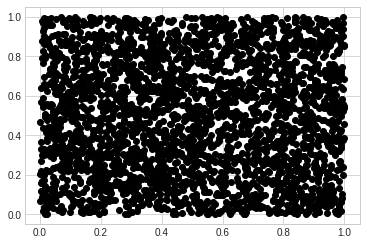

In [ ]:
#it is not less than 1 because distances can be greater than 1 (diagonal for example)
print(np.all(model_input<1.0))
plt.plot(model_output[:, :3], model_output[:, 3:], 'o', color='black') # intial points

## Simple MLP

In [ ]:
# use mlp for prediction on multi-output regression
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# get the model
def get_model(in_dim, out_dim):
  model = Sequential()
  model.add(Dense(30, input_dim=in_dim, kernel_initializer='he_uniform', activation='selu'))
  model.add(Dense(30, kernel_initializer='he_uniform', activation='selu'))
  model.add(Dense(out_dim, kernel_initializer='he_uniform'))
  model.compile(loss='mae', optimizer='adam')
  model.summary()
  return model

x, y = (model_input, model_output)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
n_inputs, n_outputs = xtrain.shape[1], ytrain.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(xtrain, ytrain, epochs=50, verbose=0)
# make a prediction for new data
x2pred = asarray([xtest[0,:]])
ypred = model.predict(x2pred)
print('Predicted: %s' % ypred[0])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                270       
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 6)                 186       
                                                                 
Total params: 1,386
Trainable params: 1,386
Non-trainable params: 0
_________________________________________________________________
Predicted: [0.3803451  0.6506705  0.4038455  0.6411467  0.32125878 0.5335997 ]


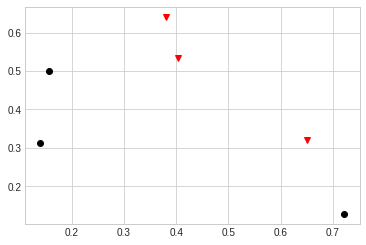

In [ ]:
plt.plot(ytest[0, :3], ytest[0, 3:], 'o', color='black') # intial points
plt.plot(ypred[0, :3], ypred[0, 3:], 'v', color='red') # calculated points

## LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# get the model
def get_model(in_dim, out_dim):
  model = Sequential()
  model.add(LSTM(64, input_shape=in_dim, activation="relu",return_sequences=True))
  model.add(LSTM(32, activation="relu",return_sequences=True))
  model.add(LSTM(16, activation="relu"))
  model.add(Dense(out_dim))
  model.compile(loss="mse", optimizer="adam")
  model.summary()
  return model

x, y = model_input, model_output
#reshape the input to match the size of lstm
x = x.reshape(x.shape[0], x.shape[1], 1)
print("x shape:", x.shape, "y shape:", y.shape)

in_dim = (x.shape[1], x.shape[2])
out_dim = y.shape[1]

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape)

model = get_model(in_dim, out_dim)
model.fit(xtrain, ytrain, epochs=10, batch_size=2, verbose=0)

ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

x shape: (1000, 8, 1) y shape: (1000, 6)
xtrain: (850, 8, 1) ytrian: (850, 6)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 8, 32)             12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense_15 (Dense)            (None, 6)                 102       
                                                                 
Total params: 32,550
Trainable params: 32,550
Non-trainable params: 0
_________________________________________________________________
y1 MSE:0.0846
y2 MSE:0.0796


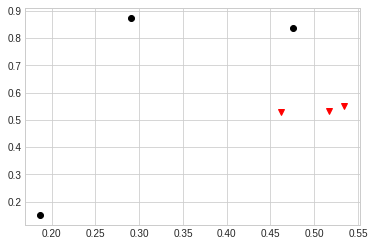

In [ ]:
plt.plot(ytest[0][:3], ytest[0][3:], 'o', color='black') # intial points
plt.plot(ypred[0][:3], ypred[0][3:], 'v', color='red') # calculated points

As you can see the poins are not well predicted (also because there are infinite solutions)